In [2]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['Target'] = iris.get('target')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = df[features].values
y = df['Target'].values

In [4]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
df_padronizado = pd.DataFrame(data=X, columns=features)
display(df_padronizado.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)


In [6]:
df_pca = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
target = pd.Series(iris['target'], name='Target')
result_df = pd.concat([df_pca, target], axis=1)
result_df

,PC1,PC2,Target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


In [7]:
print('Variance of each component:', pca.explained_variance_ratio_)
print('\nTotal variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.72962445 0.22850762]

 Total variance Explained: 95.81


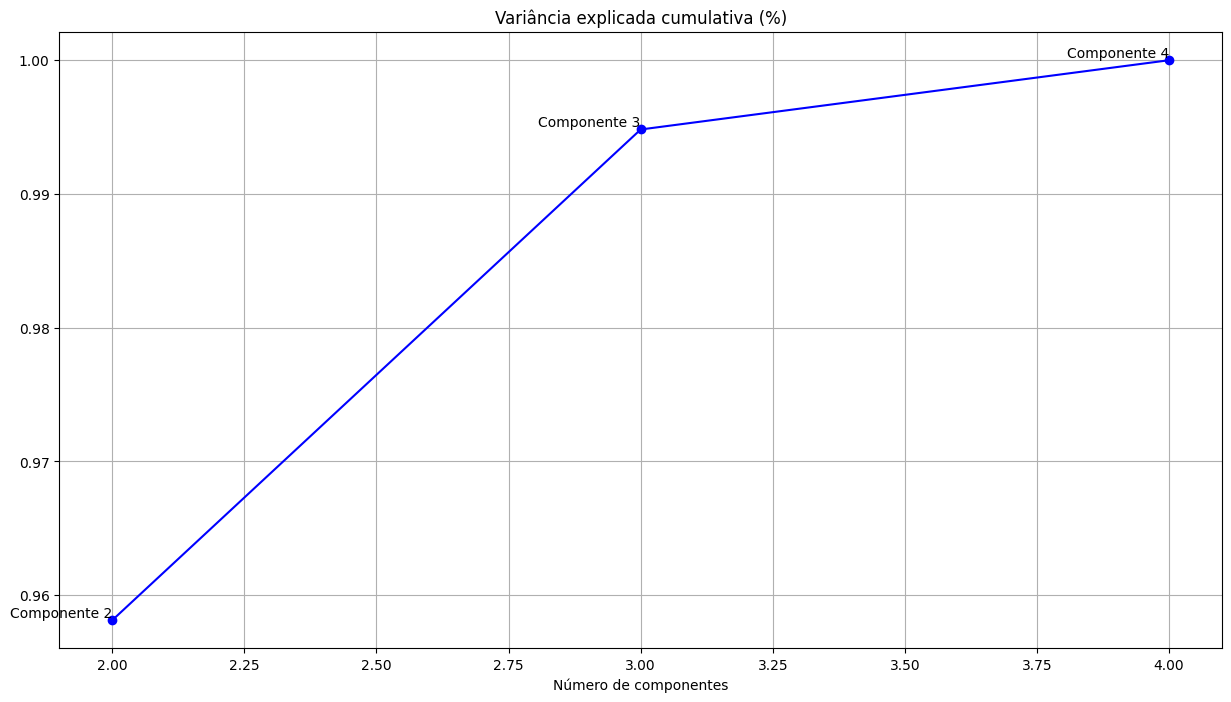

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

results = []
X = df_padronizado
for n in range(2,5):
    pca = PCA(n_components=n)
    pca.fit(X)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    results.append(explained_variance)

plt.figure(figsize=(15, 8))
plt.plot(range(2,5), results, marker='o', linestyle='-', color='b')
plt.xlabel('Número de componentes')
plt.title('Variância explicada cumulativa (%)')
plt.grid(True)
for i, (n_components, explained_var) in enumerate(zip(range(2,5), results)):
    plt.text(n_components,explained_var, f'Componente {n_components}', ha='right', va='bottom')
plt.show()